# Image quilting

In this tutorial, we demonstrate the use of the image quilting solver, which is the fastest multiple-point simulation solver in the literature. For more information about the algorithm and its performance, please watch [this video](https://www.youtube.com/watch?v=YJs7jl_Y9yM).

Before we proceed, please instantiate the environment:

In [1]:
using Pkg
push!(empty!(LOAD_PATH), @__DIR__)
Pkg.instantiate()

In [2]:
using Random; Random.seed!(2000); # make sure this tutorial is reproducible

## Problem definition

### Conditional simulation

In [3]:
using GeoStats

# create some artificial data
X = [50. 190. 150. 150.
     50. 50.  70.  190.]
z = [1,0,1,1]

sdata   = PointSetData(OrderedDict(:facies => z), X)
sdomain = RegularGrid{Float64}(250, 250)
condsim = SimulationProblem(sdata, sdomain, :facies, 3)

2D SimulationProblem (conditional)
  data:      4 PointSetData{Float64,2}
  domain:    250×250 RegularGrid{Float64,2}
  variables: facies (Int64)
  N° reals:  3

### Unconditional simulation

In [4]:
uncondsim = SimulationProblem(sdomain, :facies => Float64, 3)

2D SimulationProblem (unconditional)
  domain:    250×250 RegularGrid{Float64,2}
  variables: facies (Float64)
  N° reals:  3

## Solving the problem

Like most other multiple-point simulation solvers, image quilting is parametrized with a training image. The [GeoStatsImages.jl](https://github.com/juliohm/GeoStatsImages.jl) package provides various training images from the literature for fast experimentation in Julia. **Please give credit to the data sources if you use these images in your research**.

We load a famous image from the geostatistics literature:

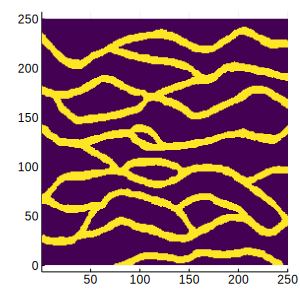

In [5]:
using GeoStatsImages
using Plots

TI = training_image("Strebelle")[:,:,1]

heatmap(TI', c=:viridis, cbar=false, aspect_ratio=:equal, size=(300,300))

and define our solver:

In [6]:
using ImageQuilting

solver = ImgQuilt(:facies => (TI=TI, tilesize=(30,30)))

ImgQuilt
  └─facies
    └─TI ⇨ [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
    └─tilesize ⇨ (30, 30)
    └─path ⇨ :raster
    └─soft ⇨ Any[]
    └─tol ⇨ 0.1


The solver can be used for unconditional simulation:

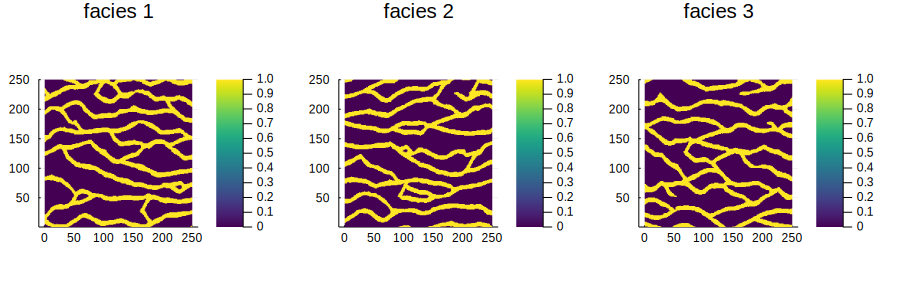

In [7]:
solution = solve(uncondsim, solver)

plot(solution, color=:viridis, size=(900,300))

as well as conditional simulation:

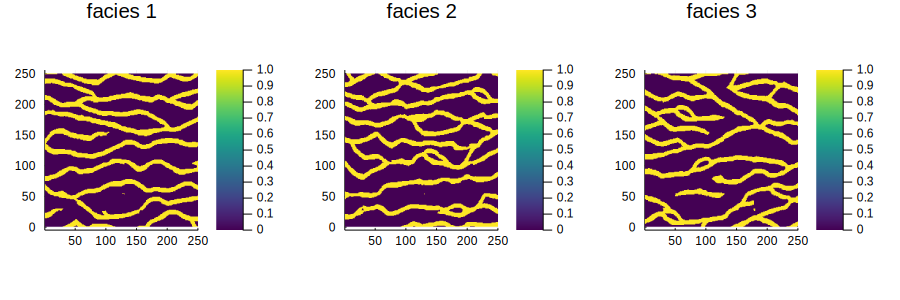

In [8]:
solution = solve(condsim, solver)

plot(solution, color=:viridis, size=(900,300))

## Conclusions

Image quilting is an efficient solver that is particularly useful when hard data is scarce. It is capable of reproducing complex texture present in training images and is very easy to tune. For more details, please refer to [Hoffimann 2017](http://www.sciencedirect.com/science/article/pii/S0098300417301139).